# K-Moyennes

In [1]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [10]:
# 1,2
from sklearn.metrics.pairwise import euclidean_distances
from random import randrange

def kmeans(X,k=3,nbr_iteration=300):
    indexs = []
    init_centroid = []
    i=0
    while i < k:
        random_value = randrange(0, X.shape[0]+1)
        if random_value not in indexs:
            indexs.append(random_value)
            init_centroid.append(X[random_value])
            i = i + 1

    init_centroid = np.array(init_centroid)
    next_centroids = np.zeros([k,X.shape[1]],dtype=float)
    _nbr_iteration = 0

    nb_iter = dict()
    for i in range(k):
        nb_iter[i] = 0

    while True:
        euc = euclidean_distances(X,init_centroid)
        sort = np.argsort(euc)
        for i,j in zip(sort,range(X.shape[0])):
            next_centroids[i[0]] += X[j]
            nb_iter[i[0]] += 1

        for i in range(k):
            if nb_iter[i] != 0:
                next_centroids[i] /= nb_iter[i]

        _nbr_iteration += 1

        if (init_centroid.tolist() == next_centroids.tolist() or _nbr_iteration == nbr_iteration) == True:
            break

        else:
            init_centroid = next_centroids.copy()
            for i in range(k):
                nb_iter[i] = 0
    return next_centroids,_nbr_iteration

centroids,_nbr_iteration = kmeans(X,k=3)

def prediction(centroids,X_test):
    distances = euclidean_distances(centroids,X_test)
    return np.argsort(distances.flatten())[0]

y_pred = []
for i in range(X.shape[0]):
    y_pred.append(prediction(centroids,[X[i]]))

print(y_pred)
    
erreur = len([i for i in range(len(y_pred)) if int(y_pred[i]) != Y[i]]) / len(y_pred)
print("Erreur:",erreur*100,"%")

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1]
Erreur: 12.0 %


In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(X)
y_pred2 = kmeans.predict(X)

print(y_pred2)
    
erreur = len([i for i in range(len(y_pred2)) if int(y_pred2[i]) != Y[i]]) / len(y_pred2)
print("Erreur:",erreur*100,"%")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Erreur: 10.666666666666668 %


In [4]:
# 3
from sklearn.metrics import silhouette_score 

no_of_clusters = range(2,11)
  
for n_clusters in no_of_clusters: 
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    print("For no of clusters =", n_clusters," The average silhouette_score is :", silhouette_avg) 

For no of clusters = 2  The average silhouette_score is : 0.681046169211746
For no of clusters = 3  The average silhouette_score is : 0.5528190123564091
For no of clusters = 4  The average silhouette_score is : 0.4980505049972864
For no of clusters = 5  The average silhouette_score is : 0.48874888709310454
For no of clusters = 6  The average silhouette_score is : 0.36483400396700155
For no of clusters = 7  The average silhouette_score is : 0.3475042328046152
For no of clusters = 8  The average silhouette_score is : 0.3597454923845753
For no of clusters = 9  The average silhouette_score is : 0.3360989238864125
For no of clusters = 10  The average silhouette_score is : 0.31565094072823013


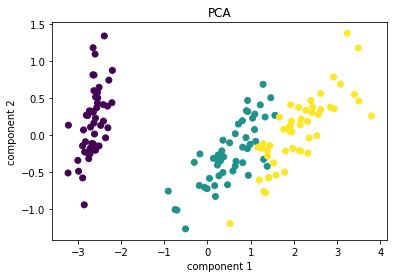

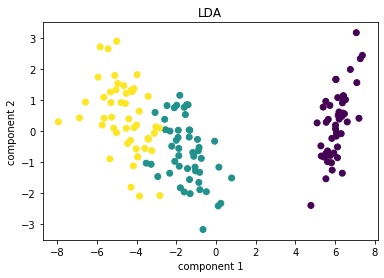

In [5]:
# 4
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

def draw(X,Y,i,j,title):
    plt.figure()
    plt.scatter(X[:,i],X[:,j],c=Y)
    plt.xlabel("component 1")
    plt.ylabel("component 2")
    plt.title(title)
    plt.show()

clf = PCA()
IrisPCA = clf.fit(X).transform(X)

clf = LDA()
IrisLDA = clf.fit(X,y_pred).transform(X)

draw(IrisPCA,Y,0,1,"PCA")
draw(IrisLDA,Y,0,1,"LDA")

# B) Analyse des données « choix projet »

In [6]:
# 1
import csv

data = csv.reader(open('choixprojetstab.csv', newline='', encoding='utf-8'), delimiter=';')
data = np.array(np.array([row for row in data])[1:,1:],dtype=int)
print(data)

[[1 1 1 ... 1 1 3]
 [1 1 1 ... 1 1 1]
 [0 0 0 ... 1 0 0]
 ...
 [1 1 1 ... 1 0 2]
 [1 1 0 ... 1 1 1]
 [1 1 1 ... 0 1 1]]


In [7]:
# 2
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift

best = 0
for i in range(100):
    kmeans = KMeans(n_clusters=4, random_state=0)
    kmeans.fit(data)
    kmy = kmeans.labels_
    nysil = silhouette_score(data, kmy)
    if nysil >= best:
        best = nysil
        
print("KMeans silhouette_score:",best)

best = 0
for i in range(100):
    meanShift = MeanShift(bandwidth=4)
    meanShift.fit(data)
    mnshy = meanShift.labels_
    nysil = silhouette_score(data, mnshy)
    if nysil >= best:
        best = nysil

print("MeanShift silhouette_score:",best)

best = 0
for i in range(100):
    clustering = DBSCAN(eps=4, min_samples=2).fit(data)
    dbs = clustering.labels_
    nysil = silhouette_score(data, dbs)
    if nysil >= best:
        best = nysil

print("DBSCAN silhouette_score:",str(best))

best = 0
for i in range(100):
    affclustering = AffinityPropagation().fit(data)
    aff = affclustering.labels_
    nysil = silhouette_score(data, aff)
    if nysil >= best:
        best = nysil

print("AffinityPropagation silhouette_score:",best)

KMeans silhouette_score: 0.2978719704538733
MeanShift silhouette_score: 0.4197404541897266
DBSCAN silhouette_score: 0.38244435248840464
AffinityPropagation silhouette_score: 0.2630360182794381
